**Load dataset**

In [6]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import sklearn
from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

import sklearn.metrics as sm
from sklearn.metrics import adjusted_mutual_info_score, homogeneity_completeness_v_measure


derm = np.loadtxt("./dermatology2.csv", delimiter=",") #Required deleting the '?' values
print(derm.shape)

# store feature matrix in "X"
#X = derm[:,0:33]
X = derm[:,0:33]

# store response vector in "y"
#y = derm[:,34]
y = derm[:,34]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)



(358, 35)
(286, 33) (286,)
(72, 33) (72,)


In [2]:
homogeneity_scores = []
completeness_scores = []
v_measure_scores = []
k_rng = range(2,50)


for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    preds = km.predict(X)
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y,preds) 
    homogeneity_scores.append(homogeneity)
    completeness_scores.append(completeness)
    v_measure_scores.append(v_measure)

In [3]:
homogeneity_scores2 = []
completeness_scores2 = []
v_measure_scores2 = []
k_rng = range(2,50)


for k in k_rng:
    km = BayesianGaussianMixture(n_components=k)
    km.fit(X)
    preds = km.predict(X)
    homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(y,preds) 
    homogeneity_scores2.append(homogeneity)
    completeness_scores2.append(completeness)
    v_measure_scores2.append(v_measure)

/home/kellgon/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # This is added back by InteractiveShellApp.init_path()


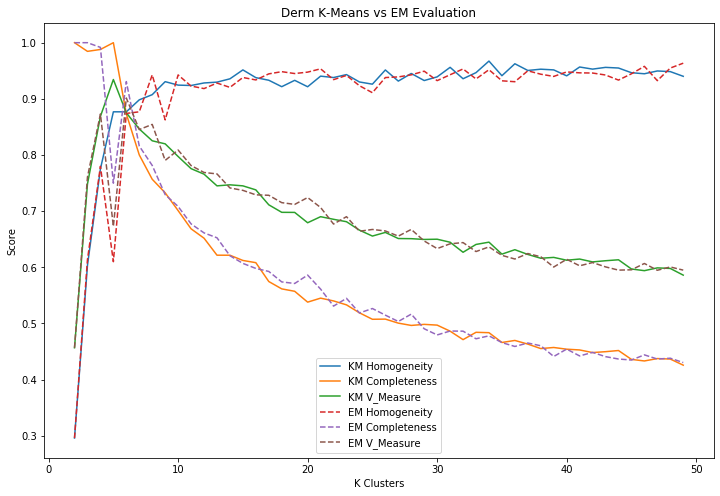

In [4]:
plt.figure(figsize = (12,8)) 
plt.xlabel('K Clusters')
plt.ylabel('Score')
plt.plot(k_rng,homogeneity_scores,label = "KM Homogeneity")
plt.plot(k_rng,completeness_scores,label = "KM Completeness")
plt.plot(k_rng,v_measure_scores,label = "KM V_Measure")
plt.plot(k_rng,homogeneity_scores2, linestyle='dashed',label = "EM Homogeneity")
plt.plot(k_rng,completeness_scores2, linestyle='dashed',label = "EM Completeness")
plt.plot(k_rng,v_measure_scores2, linestyle='dashed',label = "EM V_Measure")
plt.title('Derm K-Means vs EM Evaluation')
plt.legend(loc='bottom left')

In [7]:
likelihood = []
k_rng = range(1,20)
for k in k_rng:
    km = BayesianGaussianMixture(n_components=k, random_state=3)
    km.fit(X)
    preds = km.predict(X)
    likelihood.append(adjusted_mutual_info_score(y,preds))

Text(0.5, 1.0, 'Derm Elbow Method: EM')

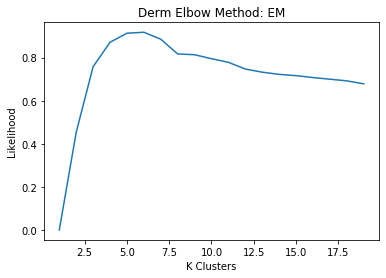

In [8]:
plt.xlabel('K Clusters')
plt.ylabel('Likelihood')
plt.plot(k_rng,likelihood)
plt.title("Derm Elbow Method: EM")

In [9]:
sum_squared_error = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k, random_state=3)
    km.fit(X)
    sum_squared_error.append(km.inertia_)

Text(0.5, 1.0, 'Derm Elbow Method: K-Means')

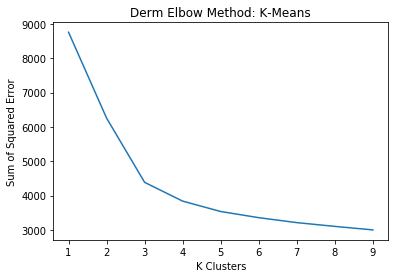

In [10]:
plt.xlabel('K Clusters')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng,sum_squared_error)
plt.title("Derm Elbow Method: K-Means")